<a href="https://colab.research.google.com/github/thefr33radical/codeblue/blob/master/AI/ml_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recommended Links :
  
* [python-course.eu](https://www.python-course.eu)
* [Google Devlopers](https://developers.google.com/machine-learning)

# Boosting & bagging

Similarities & Differences

* Both are ensemble methods to get N learners from 1 learner…

… but, while they are built independently for Bagging, Boosting tries to add new models that do well where previous models fail.

* Both generate several training data sets by random sampling…

* … but only Boosting determines weights for the data to tip the scales in favor of the most difficult cases.

* Both make the final decision by averaging  the N learners (or taking the majority of them)…

* … but it is an equally weighted average for Bagging and a weighted average for Boosting, more weight to those with better performance on training data.

* Both are good at reducing variance and provide higher stability…

* … but only Boosting tries to reduce bias. On the other hand, Bagging may solve the over-fitting problem, while Boosting can increase it.

### References:

* [Quantdare](https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/)


# Decesion Trees

The main idea of decision trees is to find those descriptive features which contain the most "information" regarding the target feature and then split the dataset along the values of these features such that the target feature values for the resulting sub_datasets are as pure as possible


## Advantages:

Applicable for categorical data, Not effected by outliers/Redundant features, No Need to impute missing data - Require very little data preparation, Interpretable, Decision Trees that is applicable for continuous and categorical inputs.

## Disadvantages:

 Overfitting, Follows Greedy Approach, Unstable, is affected by class imbalance.


* **Smooth boundaries are problematic**  i.e they work best when you have discontinuous piece wise constant model. If you truly have **a linear target function decision trees are not the best.**

* **Un-correlated variables is an issue**  Decision tree's work by finding the interactions between variables.  if you have a situation where there are no interactions between variables linear approaches might be the best.

* **Data fragmentation** : Each split in a tree leads to a reduced dataset under consideration. And, hence the model created at the split will potentially introduce bias.

* **High variance and unstable** :  As a result of the greedy strategy applied by decision tree's variance in finding the right starting point of the tree can greatly impact the final result. i.e small changes early on can have big impacts later. So- if for example you draw two different samples from your universe , the starting points for both the samples could be very different (and may even be different variables) this can lead to totally different results.

* **Instability** - The decision tree changes when I perturb the dataset a bit. This is not desirable as we want our classification algorithm to be pretty robust to noise and be able to generalize well to future observed data. This can undercut confidence in the tree and hurt the ability to learn from it. One solution - Is to switch to a tree-ensemble method that combines many decision trees on slightly different versions of the dataset.

* **Classification Plateaus** - There's a very big difference between being on the left side of a boundary instead of a right side. We could see two different flowers with similar characteristics classified very differently. Some sort of rolling hill type of classification could work better than a plateau classification scheme. One solution - (like above), is to switch to a tree-ensemble method that combines many decision trees on slightly different versions of the dataset.

* **Decision Boundaries are parallel to the axis** - We could imagine diagonal decision boundaries that would perform better, e.g. separating the setosa flowers and the versicolor flowers.

* **Interpretation**:  Decision Trees will never give you the right answer, it will give you many possible answers.  Change the root node of the tree to start with a different variable and you will probably get a different tree. Which one is correct?

* **Significance**:  Change the significance level (even a little), or the size of the bins and you will get different trees. Change the random seed and it changes as well.  Repeat the process for another sample (or even subsample) and you will get another tree. Do enough permutations on your own, and you will get the tree you want!

* **Multiple comparisons**: Tree algorithms generally use chi-square test to determine significance of any particular split.  But even before that has been determined, the algorithm has tried many combinations of variables to get the 'best' split.  That, coupled with a tree with many levels and branches can lead to an over optimized result, or many false positives due to multiple comparisons.

### References:

* [Quora](https://www.quora.com/What-are-the-disadvantages-of-using-a-decision-tree-for-classification)
* [Research gate](researchgate.net/post/What_are_pros_and_cons_of_decision_tree_versus_other_classifier_as_KNN_SVM_NN)
* [python-course.eu](https://www.python-course.eu/Decision_Trees.php)
* [Visualization kdnuggets](https://www.kdnuggets.com/2018/12/guide-decision-trees-machine-learning-data-science.html)

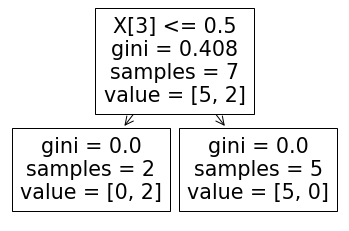

In [16]:
# Decesion Tree impl
import pandas as pd
import graphviz
from sklearn import tree

from sklearn.preprocessing import LabelEncoder
import numpy as np


# Sample data
data = pd.DataFrame({"toothed":["True","True","True","False","True","True","True","True","True","False"],
                     "hair":["True","True","False","True","True","True","False","False","True","False"],
                     "breathes":["True","True","True","True","True","True","False","True","True","True"],
                     "legs":["True","True","False","True","True","True","False","False","True","True"],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]}, 
                    columns=["toothed","hair","breathes","legs","species"])
features = data[["toothed","hair","breathes","legs"]]
target = data["species"]
data


enc=LabelEncoder()

for i in data.columns:
  data[i]=enc.fit_transform(data[i])

#print(data)
tree_model=tree.DecisionTreeClassifier()
tree_model.fit(data.iloc[:-3,:-1],data.iloc[:-3,-1])
tree.plot_tree(tree_model)  

tree_vis=tree.export_graphviz(tree_model,out_file=None,feature_names=data.columns[:-1],class_names=data.columns[-1])
graph=graphviz.Source(tree_vis)
graph.render("data")

#$tree_model.score()

def  split_data(dataset):

  X= dataset.iloc[:,:-1]
  Y= dataset.iloc[:,-1]

  from sklearn.model_selection import  train_test_split
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

  return x_train, x_test, y_train, y_test


def sklearnDtree(x_train, x_test, y_train, y_test):
  from  sklearn.tree import DecisionTreeClassifier

  tree_model=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, \
                         min_weight_fraction_leaf=0.0, max_features=None, random_state=None, \
                         max_leaf_nodes=None,  min_impurity_split=None, \
                         class_weight=None, ccp_alpha=0.0) 
  
x_train, x_test, y_train, y_test=split_data(data)
sklearnDtree(x_train, x_test, y_train, y_test)

# KMEANS

T(C) = O(no of data points X number of clusters X Dimension od data points X Number of Iterations)

k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

The problem is computationally difficult (NP-hard); however, efficient heuristic algorithms converge quickly to a local optimum. These are usually similar to the **expectation-maximization algorithm for mixtures of Gaussian distributions** via an iterative refinement approach employed by both k-means and Gaussian mixture modeling. They both use cluster centers to model the data; however, k-means clustering tends to find clusters of comparable spatial extent, while the expectation-maximization mechanism allows clusters to have different shapes.

The algorithm has a loose relationship to the k-nearest neighbor classifier, a popular machine learning technique for classification that is often confused with k-means due to the name. Applying the 1-nearest neighbor classifier to the cluster centers obtained by k-means classifies new data into the existing clusters. This is known as nearest centroid classifier or Rocchio algorithm.

The term "k-means" was first used by **James MacQueen in 1967**,though the idea goes back to Hugo Steinhaus in 1956.The standard algorithm was first proposed by Stuart Lloyd of Bell Labs in 1957 as a technique for pulse-code modulation, though it wasn't published as a journal article until 1982. In 1965, Edward W. Forgy published essentially the same method, which is why it is sometimes referred to as **Lloyd-Forgy**.

k-means clustering, and its associated expectation-maximization algorithm, is a special case of a **Gaussian mixture model**, specifically, the limit of taking all covariances as diagonal, equal and small. It is often easy to generalize a k-means problem into a Gaussian mixture model. Another generalization of the k-means algorithm is the **K-SVD algorithm**, which estimates data points as a sparse linear combination of "codebook vectors". k-means corresponds to the special case of using a single codebook vector, with a weight of 1.

**Assumptions**
* A key limitation of k-means is its cluster model. 
* The concept is based on **spherical clusters** that are separable so that the mean converges towards the cluster center.
* The clusters are expected to be of **similar size**, so that the assignment to the nearest cluster center is the correct assignment.

**Applications**
* k-means clustering is rather easy to apply to even large data sets, particularly when using heuristics such as Lloyd's algorithm. It has been successfully used in market segmentation, computer vision, and astronomy among many other domains. It often is used as a preprocessing step for other algorithms, for example to find a starting configuration.

* Vector quantization :
k-means originates from signal processing, and still finds use in this domain. For example, in computer graphics, color quantization is the task of reducing the color palette of an image to a fixed number of colors k. The k-means algorithm can easily be used for this task and produces competitive results. A use case for this approach is image segmentation. Other uses of vector quantization include non-random sampling, as k-means can easily be used to choose k different but prototypical objects from a large data set for further analysis.

* Cluster analysis :In cluster analysis, the k-means algorithm can be used to partition the input data set into k partitions (clusters).

**Advantages** 
* Relatively simple to implement.

* Scales to large data sets.

* Guarantees convergence.

* Can warm-start the positions of centroids.

* Easily adapts to new examples.

* Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

**Disadvantages**
* The pure k-means algorithm is **not very flexible**, and as such is of limited use (except for when vector quantization as above is actually the desired use case). 
* In particular, the parameter **k is known to be hard to choose** when not given by external constraints. 
* Another limitation is that it **cannot be used with arbitrary distance** functions 
* **Cannot be used with non-numerical data.**

**Quirks**
* The number of clusters k is an input parameter: an inappropriate choice of k may yield poor results. That is why, when performing k-means, it is important to run diagnostic checks for determining the number of clusters in the data set.

### Refereces

* https://developers.google.com/machine-learning/clustering
* Kneedle : https://raghavan.usc.edu//papers/kneedle-simplex11.pdf
* Theory : https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
* Theory : https://en.wikipedia.org/wiki/K-means_clustering
* Rocchio Algorithm : https://nlp.stanford.edu/IR-book/html/htmledition/rocchio-classification-1.html
*


In [ ]:
!pip install pyspark

     |████████████████████████████████| 215.7MB 106kB/s 
     |████████████████████████████████| 204kB 44.4MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=4862a2f2441986f000a442c7aedc9e8e4ab78c985ae86ce91afc7489946a7ce7
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


NameError: ignored

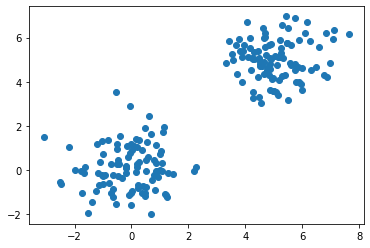

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random



def sklearnKMeans(train_x,k):
  pass

def KMeans(train_x,k):
  """
  user defined functions to find clusters using Kmeans
  """
  
  cluster_one =np.random.normal(0,1,size=(100,2))
  cluster_two=np.random.normal(5,1,size=(100,2))
  
  train_x=np.append(cluster_one,cluster_two,axis=0)
  #print(train_x)
  data =pd.DataFrame(train_x)
  plt.scatter(train_x[:,0],train_x[:,1])
  
  k=3
  d =data.shape[1]
  iterations=10
  n=len(train_x)
  centroids=np.zeros([k,d])
  
  temp_centroids=np.zeros([k,d])
  dist=np.zeros(n)
  # Intialize a matrix for storing centoids of length k and dimensions d
  for i in range(len(centroids)):
    centroids[i]=random.choice([0,len(train_x)])
    temp_centroids[i]=random.choice([0,len(train_x)])
    
  # Overall = O(n x k x d x i)
  
  for i in range(iterations):
               
        # Time complexity = O(n X k X d)
        temp_centroids, dist = compute_eucledian(centroids,k,train_x,d)
        
  
  
  

      
      
      
    
KMeans(None, None)
  
  
  

In [ ]:
import keras
from keras.datasetsimport cifar10
from keras.models import Sequential
from keras.layers import Conv2D,Dense, MaxPooling2D, Activation, Flatten, Dropout

(train_x,train_y),(test_x,test_y)=cifar10.load_data()



def CNN(train_x,train_y,test_x,test_y):
  pass
















